#Импорт необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

import seaborn as sns

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Импорт данных

In [ ]:
airlines = pd.read_csv('gdrive/My Drive/Test_S7/airlines.csv', index_col = 'carrier', decimal=',')
airlines.head()

,name
carrier,
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.


In [ ]:
airports = pd.read_csv('gdrive/My Drive/Test_S7/airports.csv', index_col = 'faa', decimal=',')
airports.head()

,name,tzone
faa,,
04G,Lansdowne Airport,America/New_York
06A,Moton Field Municipal Airport,America/Chicago
06C,Schaumburg Regional,America/Chicago
06N,Randall Airport,America/New_York
09J,Jekyll Island Airport,America/New_York


In [ ]:
flights = pd.read_csv('gdrive/My Drive/Test_S7/flights.csv', decimal = ',')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762


In [ ]:
planes = pd.read_csv('gdrive/My Drive/Test_S7/planes.csv', decimal = ',')
planes.head()

,tailnum,manufacturer,model,seats
0,N10156,EMBRAER,EMB-145XR,55
1,N102UW,AIRBUS INDUSTRIE,A320-214,182
2,N103US,AIRBUS INDUSTRIE,A320-214,182
3,N104UW,AIRBUS INDUSTRIE,A320-214,182
4,N10575,EMBRAER,EMB-145LR,55


# Проверка данных

In [ ]:
for df in [airlines, airports, flights, planes]:
  print('Базовая информаия или врде того')
  display(df.info())

Базовая информаия или врде того
<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 9E to YV
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    16 non-null     object
dtypes: object(1)
memory usage: 256.0+ bytes


None

Базовая информаия или врде того
<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 04G to ZYP
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1458 non-null   object
 1   tzone   1458 non-null   object
dtypes: object(2)
memory usage: 34.2+ KB


None

Базовая информаия или врде того
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57782 entries, 0 to 57781
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dep_time        57782 non-null  object        
 1   sched_dep_time  57782 non-null  object        
 2   dep_delay       57782 non-null  int64         
 3   arr_time        57782 non-null  object        
 4   sched_arr_time  57782 non-null  object        
 5   arr_delay       57782 non-null  int64         
 6   carrier         57782 non-null  object        
 7   flight          57782 non-null  int64         
 8   tailnum         57782 non-null  object        
 9   origin          57782 non-null  object        
 10  dest            57782 non-null  object        
 11  distance        57782 non-null  int64         
 12  part_day_dep    57782 non-null  int64         
 13  part_day_arr    57782 non-null  int64         
 14  date            57782 

None

Базовая информаия или врде того
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tailnum       3322 non-null   object
 1   manufacturer  3322 non-null   object
 2   model         3322 non-null   object
 3   seats         3322 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 103.9+ KB


None

В таблице flights пропуски данных

In [ ]:
flights.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
distance             0
dtype: int64

In [ ]:
# пропуски, дубликаты, количество уникальных значений

In [ ]:
for df, name in zip([airlines, airports, flights, planes], ['Перевозчики', 'Аэропорты', 'flights', 'planes']):
  print (f'Таблица {name}')
  print(f'Процент пропусков:')
  df_nulls = pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['Nulls']).sort_values(by='Nulls', ascending=False)
  #df_nulls = df_nulls[df_nulls['Nulls'] > 0]
  display(df_nulls)
  df_dupl = df[df.duplicated()]
  numbers_dupl = len(df_dupl)
  print(f'Количество дубликатов: {numbers_dupl}')
  df_nuniques = pd.DataFrame(df.nunique(), columns=['Unique values']).sort_values(by='Unique values', ascending=False)
  print('Количество уникальных значений: ')
  display(df_nuniques)
  print(10*'------')

Таблица Перевозчики
Процент пропусков:


,Nulls
name,0.0


Количество дубликатов: 0
Количество уникальных значений: 


,Unique values
name,16


------------------------------------------------------------
Таблица Аэропорты
Процент пропусков:


,Nulls
name,0.0
tzone,0.0


Количество дубликатов: 12
Количество уникальных значений: 


,Unique values
name,1440
tzone,10


------------------------------------------------------------
Таблица flights
Процент пропусков:


,Nulls
dep_time,0.0
sched_dep_time,0.0
is_reg_dep,0.0
weekday,0.0
date,0.0
part_day_arr,0.0
part_day_dep,0.0
distance,0.0
dest,0.0
origin,0.0


Количество дубликатов: 0
Количество уникальных значений: 


,Unique values
flight,1284
arr_time,1231
dep_time,1175
sched_arr_time,1075
sched_dep_time,953
tailnum,620
arr_delay,437
dep_delay,370
date,365
distance,53


------------------------------------------------------------
Таблица planes
Процент пропусков:


,Nulls
tailnum,0.0
manufacturer,0.0
model,0.0
seats,0.0


Количество дубликатов: 0
Количество уникальных значений: 


,Unique values
tailnum,3322
model,127
seats,48
manufacturer,35


------------------------------------------------------------


# Посчитаем процент пропущенных данных

In [ ]:
pct_missing = flights.isnull().sum(axis=0).reset_index()
pct_missing.columns = ['variable', 'missing values']
pct_missing['missing in %']=(1 - (flights.shape[0]- pct_missing['missing values'])/flights.shape[0])*100
pct_missing.sort_values('missing in %', ascending=False).reset_index(drop = True)

,variable,missing values,missing in %
0,arr_delay,9430,2.800081
1,arr_time,8713,2.587180
2,dep_time,8255,2.451184
3,dep_delay,8255,2.451184
4,tailnum,2512,0.745896
5,year,0,0.000000
6,month,0,0.000000
7,day,0,0.000000
8,sched_dep_time,0,0.000000
9,sched_arr_time,0,0.000000


Процент пропущенных данных меньше 3%, можно удалить пропуски для дальнейшего анализа

#Удалим пропуски, т.к. по этим данным сложно сделать какие-либо выводы

In [ ]:
flights.dropna(inplace=True)

#Добавим столбец с признаком происходит ли вылет и прилёт в первой половине дня или нет (1 - первая, 0 - вторая)

In [ ]:
flights['part_day_dep'] = (flights['dep_time'].astype(float)<1400.0)*1
flights['part_day_arr'] = (flights['arr_time'].astype(float)<1400.0)*1

In [ ]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,part_day_dep,part_day_arr
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400,1,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416,1,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089,1,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576,1,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762,1,1


#Преобразуем дату из 3 столбцов в 1

In [ ]:
flights['date'] = pd.to_datetime(flights[['year', 'month', 'day']])

In [ ]:
flights.drop(['year', 'month', 'day'], axis = 1, inplace = True)

#Добавим столбец с днем недели

In [ ]:
flights['weekday'] = flights['date'].dt.dayofweek

#Отберём только интересующую нас компанию UA

In [ ]:
flights = flights[flights['carrier'] == 'UA'].reset_index()
flights.drop(['index'], axis = 1, inplace = True)

#Оставим целую часть без .0

In [ ]:
for i in range(len(flights['dep_time'])):
  flights['dep_time'][i] = flights['dep_time'][i].replace('.0','')

In [ ]:
for i in range(len(flights['arr_time'])):
  flights['arr_time'][i] = flights['arr_time'][i].replace('.0','')

In [ ]:
for i in range(len(flights['dep_delay'])):
  flights['dep_delay'][i] = flights['dep_delay'][i].replace('.0','')

In [ ]:
for i in range(len(flights['arr_delay'])):
  flights['arr_delay'][i] = flights['arr_delay'][i].replace('.0','')

Преобразуем в строковый тип

In [ ]:
flights['sched_dep_time'] = flights['sched_dep_time'].astype(str)


In [ ]:
flights['sched_arr_time'] = flights['sched_arr_time'].astype(str)

Преобразование времени разного формата

In [ ]:
def convert_string_to_time(i):
  if len(i) == 4:
    return dt.time(hour=int(i[0:2]), minute=int(i[2:4]))
  elif len(i) == 3:
    return dt.time(hour=int(i[0]), minute=int(i[1:3]))
  elif len(i) == 2:
    return dt.time(minute = int(i[0:2]))
  else:
    return dt.time(minute=int(i[0]))

In [ ]:
flights['dep_time']=flights['dep_time'].apply(convert_string_to_time)
flights['arr_time']=flights['arr_time'].apply(convert_string_to_time)
flights['sched_dep_time']=flights['sched_dep_time'].apply(convert_string_to_time)
flights['sched_arr_time']=flights['sched_arr_time'].apply(convert_string_to_time)

In [ ]:
flights.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,part_day_dep,part_day_arr,date,weekday,is_reg_dep,is_reg_arr,is_dep_del
0,05:17:00,05:15:00,2,08:30:00,08:19:00,11,UA,1545,N14228,EWR,IAH,1400,1,1,2013-01-01,1,0,0,С задержкой
1,05:33:00,05:29:00,4,08:50:00,08:30:00,20,UA,1714,N24211,LGA,IAH,1416,1,1,2013-01-01,1,0,0,С задержкой
2,05:54:00,05:58:00,-4,07:40:00,07:28:00,12,UA,1696,N39463,EWR,ORD,719,1,1,2013-01-01,1,1,0,Раньше
3,05:58:00,06:00:00,-2,09:24:00,09:17:00,7,UA,194,N29129,JFK,LAX,2475,1,1,2013-01-01,1,1,0,Раньше
4,05:58:00,06:00:00,-2,09:23:00,09:37:00,-14,UA,1124,N53441,EWR,SFO,2565,1,1,2013-01-01,1,1,1,Раньше


In [ ]:
flights['dep_delay'] = flights['dep_delay'].astype(int)
flights['arr_delay'] = flights['arr_delay'].astype(int)

#Добавим колонки с признаком регулярности отправлений и прибытий

In [ ]:
flights['is_reg_dep'] = (flights['dep_delay'] <=1 ) * 1
flights['is_reg_arr'] = (flights['arr_delay'] <=1 ) * 1

#Аналитика

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean(), 'sum': group.sum()}

global_stats = flights[flights['dep_delay']>0]['dep_delay'].groupby(flights['origin']).apply(get_stats).unstack()
global_stats.sort_values('sum')

,min,max,count,mean,sum
origin,,,,,
JFK,1.0,364.0,1478.0,32.189445,47576.0
LGA,1.0,483.0,3033.0,38.348170,116310.0
EWR,1.0,424.0,22614.0,28.485584,644173.0


In [ ]:
conditions  = [flights['dep_delay']==0, flights['dep_delay']>0, flights['dep_delay']<0]
choices     = ['Вовремя', 'С задержкой', 'Раньше']
    
flights['is_dep_del'] = np.select(conditions, choices, default=np.nan)

In [ ]:
flights['is_dep_del'].value_counts(normalize=True)*100

Раньше         47.185975
С задержкой    46.943685
Вовремя         5.870340
Name: is_dep_del, dtype: float64

In [ ]:
flights.set_index('date')

#Отфильтруем таблицу и рассмотрим только рейсы с задержкой. Сгрупперуем показатели по месяцам и построим тепловую карту матрицы корреляций

Выберем все рейсы с задержкой по вылету 

In [ ]:
heat_M = flights[flights['dep_delay'] > 0].groupby(pd.Grouper(key="date", freq="M")).sum()

In [ ]:
sum_dep_delay_M = heat_M['dep_delay']

Выберем все рейсы с задержкой по прибытию

In [ ]:
heat_M = flights[flights['arr_delay'] > 0].groupby(pd.Grouper(key="date", freq="D")).sum()

In [ ]:
heat_M.drop(['flight'], axis = 1, inplace = True)

In [ ]:
heat_M['dep_delay'] = sum_dep_delay_M

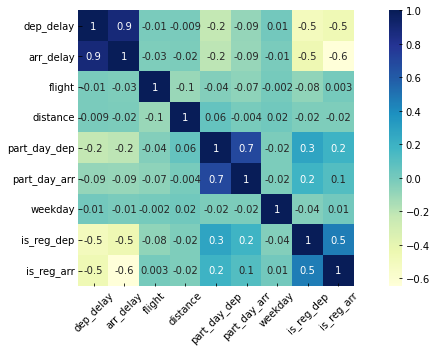

In [ ]:
plt.figure(figsize=(10, 5))

sns.heatmap(flights.corr(), annot=True, fmt='.1g', cmap='YlGnBu', square=True)

plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=45)  # ensure x-axis ticklabels are vertical
plt.tight_layout()

plt.show()

Построим отдельно интересующие нас зависимости

In [ ]:
heat_M.head()

,dep_delay,arr_delay,distance,part_day_dep,part_day_arr,weekday,is_reg_dep,is_reg_arr
date,,,,,,,,
2013-01-01,NaN,1793,131025,45,34,93,35,3
2013-01-02,NaN,2352,123965,40,31,188,27,3
2013-01-03,NaN,1384,93112,34,28,213,22,4
2013-01-04,NaN,837,44144,8,10,136,4,2
2013-01-05,NaN,1109,64160,20,10,210,11,3


In [ ]:
sns.barplot(data=)

SyntaxError: ignored

In [ ]:
x1 = np.array(heat_M.index)
y1 = heat_M['dep_delay']
y2 = heat_M['arr_delay']

fig, ax = plt.subplots()
ax.bar(x1,y1, width=0.4)
ax.bar(x1,y2, width=0.4)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(heat_M['arr_delay'])

plt.title('Суммарное время задержки вылета')
plt.xlabel('День')
plt.ylabel('Время')

plt.show()

#Сгрупперуем показатели по дням и построим тепловую карту матрицы корреляций

Выберем все рейсы с задержкой по вылету 

In [ ]:
heat_D = flights[flights['dep_delay'] > 0].groupby(pd.Grouper(key="date", freq="D")).sum()

In [ ]:
sum_dep_delay_D = heat_D['dep_delay']

Выберем все рейсы с задержкой по прибытию

In [ ]:
heat_D = flights[flights['arr_delay'] > 0].groupby(pd.Grouper(key="date", freq="D")).sum()

In [ ]:
heat_D.drop(['flight'], axis = 1, inplace = True)

In [ ]:
heat_D['dep_delay'] = sum_dep_delay_D

In [ ]:
plt.figure(figsize=(7, 5))
 
sns.heatmap(heat_D.corr(), annot=True, fmt='.1g', cmap='YlGnBu', square=True)

plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=45)  # ensure x-axis ticklabels are vertical
plt.tight_layout()

plt.show()

Коррелируют:
- задержка вылета с днем недели (0,7) высокая прямая зависимость
- задержка вылета с тем в какой половине дня вылетает самолет (0,3) умеренная 
- задержка вылета с тем в какой половине дня прибывает самолет (0,5) умеренная
- задержка вылета с дальностью полёта (0,7) высокая
- сильно коррелируют задержка вылета с задержкой прибытия (1), что логично. Победим задержку вылета, уйдёт проблема с задержкой прибытия, весьма высокая


In [ ]:
labels = flights['origin'].unique()
sizes = flights['origin'].value_counts()

explode = [0 if sizes[i] < 20000 else 0.1 for i in range(len(labels))]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [ ]:
labels = flights['dest'].unique()
sizes = flights['dest'].value_counts()


fig2, ax2 = plt.subplots(figsize=(15,10))

explode = [0 if sizes[i] > 4500 else 0.1 for i in range(len(labels))]

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  
ax2.legend()
plt.show()

# Сохранение результатов

In [ ]:
#from google.colab import drive
#drive.mount('drive')
#filtred_data.to_csv('Fin_info.csv',sep=',')
#!cp Fin_info.csv 'drive/My Drive/'